In [1]:
!pip install tqdm

In [2]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import notebook
import time

In [8]:
etc = pd.read_csv("C:/Users/yeonb/Desktop/PythonWorkspace/alldata_title.csv")

In [9]:
len(etc)

69957

In [10]:
etc.head(1)

,title
0,웹디자이너


In [11]:
etc.title = etc.title.astype("str")
etc2 = list(etc.title)#리스트로 만들어보자
etc2[0:3]

['웹디자이너', '데이터 마케팅팀 팀장급', '아이디어스 푸드 카테고리 작가 영입브랜드 소싱&영업 담당']

In [21]:
# import strip
from string import punctuation #구두점 제거, 특수문자 제
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)

clean_title[0:10]

['웹디자이너',
 '데이터 마케팅팀 팀장급',
 '아이디어스 푸드 카테고리 작가 영입브랜드 소싱영업 담당',
 '아이디어스 CRM 마케터',
 '이더리움 스마트 컨트렉트 개발자',
 '이터널 리턴콘솔 서버 프로그래머',
 ' 테스트  엔지니어',
 ' 테스트  Lead 엔지니어',
 '서버 개발자 서버  개발자  전문연구요원',
 '회계 System Principal  상품  Owner']

In [22]:
from konlpy.tag import *
okt = Okt()

In [23]:
import time
import datetime
start = time.time()

In [24]:
# dataset = [ ] #한글 이랑 알파벳아니면 공백처리
# for i in notebook.tqdm(range(len(clean_title))) :
#     dataset.append(okt.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))

# sec =time.time()-start
# times = str(datetime.timedelta(seconds=sec)).split(".")


# times = times[0]
# print(times)

In [25]:
 
#비중이 많은 단어 제거시 사용(특정문자 덜어내고공백만들기)
#비중이 너무큰 단어나 의미없는 단어 덜어내고 하위 키워드 꺼낼 때 사용
#토픽모델링 시각화후 다시 전처리
clean_title2 = [] 

for i in range(len(clean_title)):
    clean_title2.append(re.sub('기업',' ',clean_title[i]))
    
clean_title3 = []
for i in range(len(clean_title2)):
    clean_title3.append(re.sub('취업',' ',clean_title2[i]))
    
clean_title4 = []    
for i in range(len(clean_title3)):
    clean_title4.append(re.sub('취준생',' ',clean_title3[i]))
    
clean_title5 = []    
for i in range(len(clean_title4)):
    clean_title5.append(re.sub('취준',' ',clean_title4[i]))
    
clean_title6 = []    
for i in range(len(clean_title5)):
    clean_title6.append(re.sub('기타',' ',clean_title5[i]))


In [26]:
dataset = [ ] #한글 이랑 알파벳아니면 공백처리
for i in notebook.tqdm(range(len(clean_title6))) :
    dataset.append(okt.morphs(re.sub('[^가-힣a-zA-Z\s]','',clean_title6[i])))

sec =time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")


times = times[0]
print(times)

  0%|          | 0/69957 [00:00<?, ?it/s]

0:01:21


In [19]:
dataset

[]

In [27]:
from gensim import corpora, models
import gensim

C:\Users\yeonb\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [28]:
high_score_word = dataset

In [29]:
high_score_word = [[y for y in x if not len(y)==1]#dic형태로 명사리스트 만들기
                  for x in high_score_word]#명사 형태 문서별로 말뭉치
dictionary = corpora.Dictionary(high_score_word)
corpus = [dictionary.doc2bow(text) for text in high_score_word]

In [30]:
import matplotlib.pyplot as plt#cohenrencemodel을통한 토픽 최적화
# 높을수록 의미론적 일관성이 높음, 해달 모델이 얼마나 실제로 의미있는결과낼지 
from gensim.models import CoherenceModel

coherence_values=[]
for i in notebook.tqdm(range(2,22)) :
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts = high_score_word, dictionary = dictionary, topn=10)
    coherence_lda =coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

  0%|          | 0/20 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

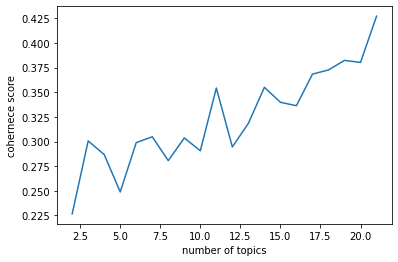

In [31]:
x=range(2,22)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("cohernece score")
plt.show

In [32]:
import matplotlib.pyplot as plt
perplexity_values = [] 
#선정된 토픽갯수마다 학습시켜 가장 낮은 값 보이는 구간찾아서 최적화된 토픽개수선정 가능
# 동일 모델 내 파라미터에 따른 성능평가시 사용, 낮을수록 정확하게 예측
perplexity_values=[]
for i in notebook.tqdm(range(2,22)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

  0%|          | 0/20 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

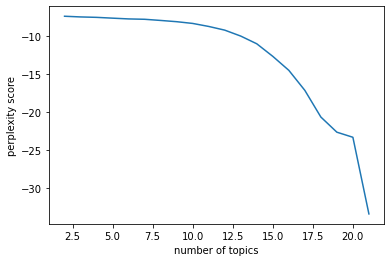

In [33]:
x=range(2,22)
plt.plot(x,perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show


In [34]:
#하이퍼 파라미터  선정 및 시각화
default iterations = 50


SyntaxError: invalid syntax (<ipython-input-34-b8058561ae50>, line 2)

In [ ]:
#위의 결과들 바탕으로 갯수 수정
#학습된 코퍼스(말뭉치)로 토픽 개수를 선정
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, alpha = "auto", eta = "auto",passes = 400,chunksize=2000,
                                           id2word=dictionary)


In [35]:
ldamodel.print_topics(num_words=20)

[(9,
  '0.149*"그룹" + 0.073*"디자인" + 0.071*"검사" + 0.064*"물류" + 0.053*"영상" + 0.037*"생활" + 0.037*"외국어" + 0.031*"컨설팅" + 0.030*"이벤트" + 0.025*"우리" + 0.017*"비교" + 0.016*"단어" + 0.013*"고객" + 0.011*"재무회계" + 0.011*"장비" + 0.008*"비전" + 0.005*"레이" + 0.005*"오퍼" + 0.005*"사원" + 0.002*"CX"'),
 (11,
  '0.153*"온라인" + 0.119*"인사" + 0.107*"해외" + 0.073*"문제" + 0.051*"엠디" + 0.041*"코딩" + 0.036*"부서" + 0.015*"화장품" + 0.013*"언어" + 0.013*"제작" + 0.011*"패션" + 0.009*"항공" + 0.007*"브랜드" + 0.007*"총무" + 0.007*"년차" + 0.006*"라이브" + 0.006*"체인" + 0.005*"미디어" + 0.005*"본부" + 0.005*"뷰티"'),
 (16,
  '0.226*"아이티" + 0.065*"스타트업" + 0.055*"투자" + 0.046*"교재" + 0.037*"전문" + 0.029*"인력" + 0.020*"회로" + 0.019*"연구" + 0.012*"전문가" + 0.012*"일본" + 0.008*"대표" + 0.007*"러닝" + 0.007*"머신" + 0.007*"총무" + 0.004*"미니" + 0.004*"비서" + 0.004*"하이" + 0.004*"자재" + 0.003*"대리" + 0.003*"Talent"'),
 (0,
  '0.188*"마케팅" + 0.178*"한국" + 0.096*"자동차" + 0.067*"케이티" + 0.045*"체험" + 0.044*"강의" + 0.035*"업무" + 0.032*"공공" + 0.028*"디지털" + 0.013*"정책" + 0.012*"글로벌" + 0.007*"문화" + 0.0

In [37]:
#철준아 시각화 `한번해보자
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis
# 알파 베타에 따라 토픽 내 분포하는 문서 , 단어 분포가 달라짐
#단어, 문서들의 이해도가 중요, 내가 원하는 주제들을 설명할수있는 단어들을 끌어내기위해
#추가로 해당 토픽에 묶인 단어들이 사용자 사전에 정의되지 않았다면
#사용자 사전을 추가하여 단어를 등록하는 과정도 필요

C:\Users\yeonb\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5      0.409935  0.132454       1        1  6.708895
7      0.107461 -0.367501       2        1  6.065437
15     0.031128 -0.019850       3        1  5.846052
20    -0.004300 -0.047377       4        1  5.178572
0      0.049855 -0.019128       5        1  5.128057
18    -0.017134  0.014485       6        1  4.903096
4     -0.036304  0.017038       7        1  4.799149
3     -0.036923  0.022528       8        1  4.789600
13    -0.005844  0.009155       9        1  4.722594
11    -0.009717  0.013672      10        1  4.696456
19    -0.025189  0.019867      11        1  4.685302
9     -0.029788  0.018567      12        1  4.500755
2     -0.060104  0.026414      13        1  4.385191
6     -0.036021  0.016145      14        1  4.339528
8     -0.014271  0.013024      15        1  4.257789
1     -0.045641  0.022296      16        1  4.232102
14    -0.064216  0.025908      17        1  4.175895
17    -0.050257  0.025427      18        1  4.164816
10    -0.050317  0.023508      19        1  4.158261
16    -0.046129  0.026461      20        1  4.141588
12    -0.066224  0.026907      21        1  4.120864, topic_info=     Term          Freq         Total Category  logprob  loglift
500    채용  16663.000000  16663.000000  Default  30.0000  30.0000
203    지원  10992.000000  10992.000000  Default  29.0000  29.0000
1102   삼성   9414.000000   9414.000000  Default  28.0000  28.0000
52     경험   7090.000000   7090.000000  Default  27.0000  27.0000
225    토스   4819.000000   4819.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
88    플랫폼      2.423388    211.435210  Topic21  -8.7589  -1.2796
80     사업      3.052687    989.947773  Topic21  -8.5281  -2.5925
85    연구소      1.400200    525.389922  Topic21  -9.3075  -2.7384
59     프로      0.942203    168.101804  Topic21  -9.7036  -1.9950
257    계약      0.929789   1633.876909  Topic21  -9.7169  -4.2824

[779 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
142       9  0.643370     AD
604       5  0.832377     AE
604      19  0.026851     AE
417       9  0.156064  Admin
383      18  0.879607     Ap
...     ...       ...    ...
30        2  0.992405     회계
30        3  0.000952     회계
30        7  0.000952     회계
959      20  0.983389     회로
522      11  0.956466     회원

[680 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 16, 21, 1, 19, 5, 4, 14, 12, 20, 10, 3, 7, 9, 2, 15, 18, 11, 17, 13])

In [ ]:
# 토픽에 할당된 키워드 추출
# kk=ldamodel.show_topic(,topn=80000)#각 토픽에 할당된 단어와 단어별 토픽 차지 비율 추출
# type(ldamodel.show_topic)
# kk2 = pd.DataFrame(kk)
# kk2.head(3)

In [ ]:
# kk2.to.csv('',encoding="euc-kr")

# 구글 뉴스로 다시해보자
